# 🏡 Airbnb Price Prediction – AI Developer Task (SET B)


This notebook addresses the task of predicting Airbnb listing prices using deep exploratory data analysis (EDA),
cleaning, feature engineering, and custom ANN modeling – all based on the instruction document provided.


## 🔍 Step 1: Exploratory Data Analysis (EDA)

### 1.1 Understand the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('airbnb.csv')
df.head()


,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


### 1.2 Identify Data Types & Missing Values

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,8
host_id,0
address,0
features,0
amenities,0


### 1.3 Distribution of Target and Other Numerical Columns

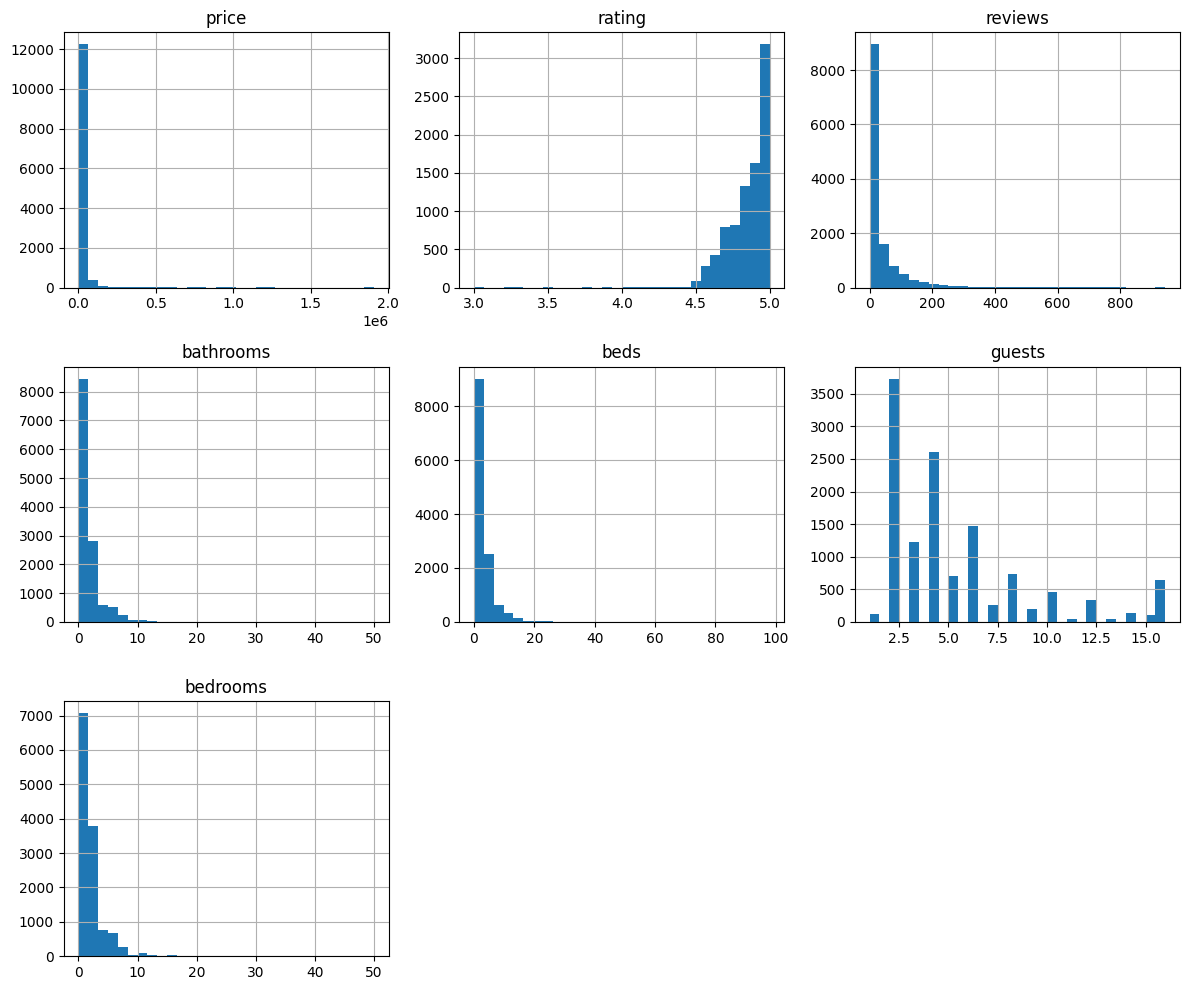

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

num_cols = ['price', 'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'bedrooms']
df[num_cols].hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()


### 1.4 Outlier Detection in Price

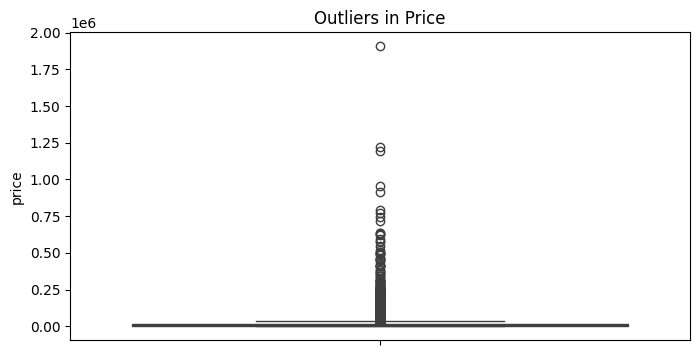

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(df['price'])
plt.title("Outliers in Price")
plt.show()


### 1.5 Correlation Analysis

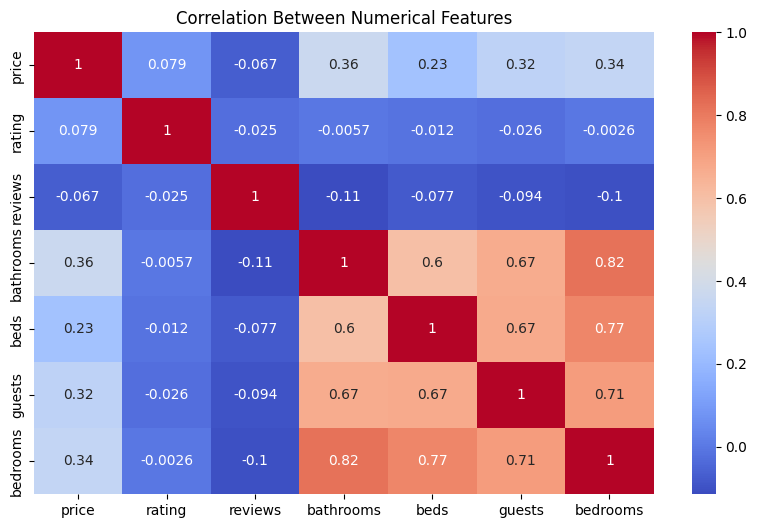

In [ ]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


### 1.6 Categorical Features

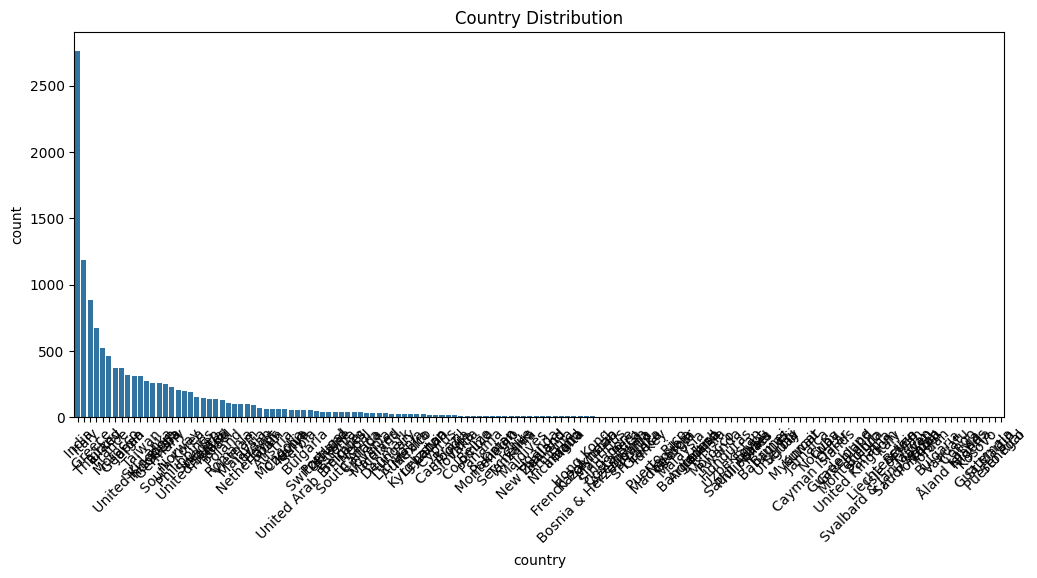

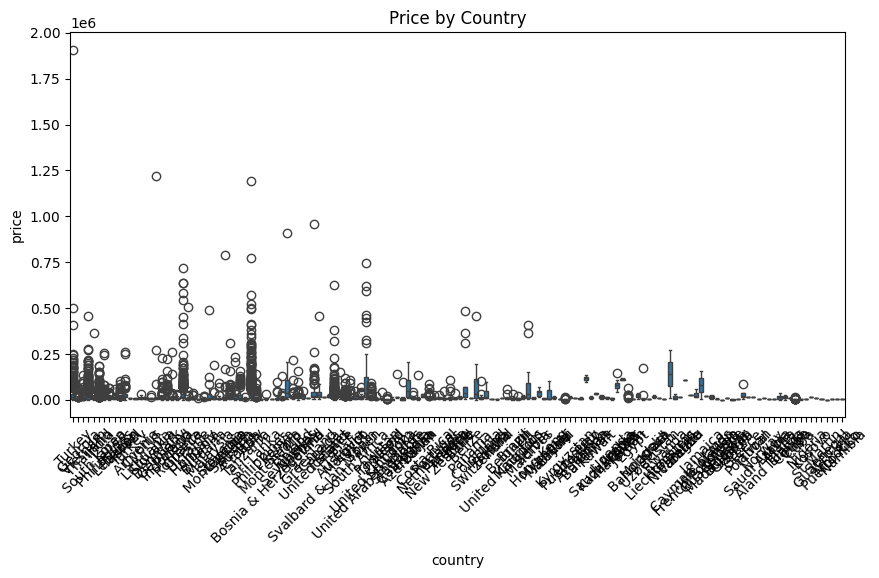

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title("Country Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='country', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Country")
plt.show()


## 🧹 Step 2: Data Cleaning

### 2.1 Handling Missing Values

In [ ]:
# Drop rows where check-in or checkout info is missing (essential for stay logic)
df.dropna(subset=['checkin', 'checkout'], inplace=True)

# Fill missing numeric columns
df['rating'] = df['rating'].fillna(df['rating'].median())
df['reviews'] = df['reviews'].fillna(df['reviews'].median())

# Fill missing host names with "Unknown"
df['host_name'] = df['host_name'].fillna('Unknown')


### 2.2 Outlier Detection & Removal

In [ ]:
# Keep only listings below 99th percentile for price
price_threshold = df['price'].quantile(0.99)
df = df[df['price'] < price_threshold]
print(f"Remaining rows after outlier removal: {len(df)}")


Remaining rows after outlier removal: 10094


### 2.3 Convert Categorical Variables

In [ ]:
# We'll one-hot encode 'host_name' and 'country' later using ColumnTransformer
categorical_cols = ['host_name', 'country']


### 2.4 Feature Scaling Preparation

In [ ]:
# Ensure all numerical columns are clean
numerical_cols = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']

# Extract features from the 'features' column if still present
if 'features' in df.columns:
    df[['guests_f', 'bedrooms_f', 'beds_f', 'bathrooms_f']] = df['features'].str.extract(r'(\d+) guests.*?(\d+) bedrooms.*?(\d+) beds.*?(\d+) bathrooms').astype(float)
    df.drop(columns=['features'], inplace=True)
    numerical_cols += ['guests_f', 'bedrooms_f', 'beds_f', 'bathrooms_f']


In [ ]:
X = df[categorical_cols + numerical_cols]
y = df['price']


## 🧠 Step 3: Model Creation – ANN with Keras

In [ ]:
from sklearn.model_selection import train_test_split

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ("scale", StandardScaler(), numerical_cols)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=0)


##  Step 4: Accuracy Improvement & Evaluation

### 4.1 Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test).flatten()
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ValueError: Input contains NaN.

### 4.2 Actual vs Predicted

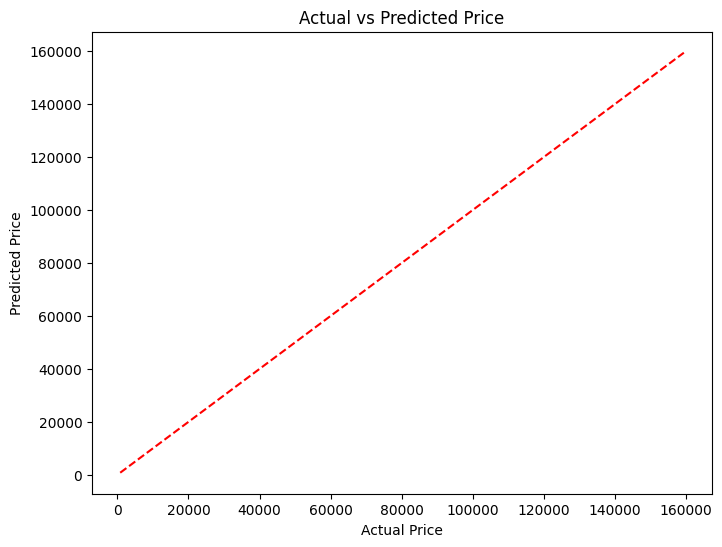

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### 4.3 Notes on Hyperparameter Tuning


You can experiment with:
- Increasing/decreasing number of neurons
- Changing dropout rates
- Varying activation functions
- Using different optimizers or learning rates


## 📝 Step 5: Final Submission


### ✅ Completed Workflow:
- Data exploration and cleaning
- Feature transformation and encoding
- ANN model creation using Keras
- Evaluation and performance visualization

> This notebook can now be submitted for the SET B AI Developer task.
